In [22]:
import numpy as np
import pandas as pd
import tensorflow as tf
from keras import layers, models, optimizers
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import preprocessing
import pickle

In [23]:
# Convert balanced csv into dataframe and seperate labels
DATASET_PATH = "/Users/connormaclachlan/Desktop/CS433_Project/KAGGLE/DATASET-balanced.csv"
df = pd.read_csv(DATASET_PATH)
data = df.iloc[:,:-1]
labels = df.iloc[:,-1]

# Binarize labels
lb = preprocessing.LabelBinarizer()
lb.fit(labels)
labels = lb.transform(labels)
labels = labels.ravel()

data

,chroma_stft,rms,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,...,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20
0,0.338055,0.027948,2842.948867,4322.916759,6570.586186,0.041050,-462.169586,90.311272,19.073769,24.046888,...,-14.181895,-6.686564,0.902086,-7.251551,-1.198342,4.747403,-4.986279,0.953935,-5.013138,-6.779060
1,0.443766,0.037838,2336.129597,3445.777044,3764.949874,0.047730,-409.413422,120.348808,-7.161531,5.114784,...,0.372541,-2.131157,-6.876417,-1.359395,0.326401,-5.420016,-2.109968,-1.757634,-9.537907,-8.494421
2,0.302528,0.056578,2692.988386,2861.133180,4716.610271,0.080342,-318.996033,120.490273,-24.625771,23.891073,...,-3.099179,-5.853725,-3.724773,-6.627182,-5.117002,-6.072106,-0.994653,-1.617120,-3.922354,-7.033001
3,0.319933,0.031504,2241.665382,3503.766175,3798.641521,0.047180,-404.636749,136.320908,2.308172,-3.907071,...,1.513633,-1.898315,-2.046493,-7.176277,-3.293508,4.209121,0.121835,-5.407063,-3.654926,-3.274857
4,0.420055,0.016158,2526.069123,3102.659519,5025.077899,0.051905,-410.497925,152.731400,-18.266771,51.993462,...,11.086248,-1.952340,0.810868,6.238493,6.555839,7.535542,2.849219,2.616843,-1.793357,-5.060998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11773,0.435426,0.025303,2772.575031,2728.757601,4998.670213,0.074323,-342.309753,144.490418,-79.272942,8.890874,...,-2.950688,-17.982819,-7.831161,-1.127167,-7.669674,-0.653850,-8.037575,-2.671002,-4.483765,-3.355975
11774,0.454611,0.070578,1029.274601,1519.231563,1922.927486,0.026553,-332.230408,202.603012,-0.181929,-2.146542,...,-2.910435,-2.018668,-2.705635,-1.589172,-2.938737,-0.972690,-1.706672,-2.796168,2.171270,-1.660128
11775,0.374432,0.019063,4063.645317,3558.261357,7299.133512,0.110278,-372.149109,92.670235,-29.082432,59.736637,...,-17.552000,-6.628118,-3.827499,-7.287946,-2.899543,-11.508186,-1.296590,-14.325416,-4.405540,-15.869982
11776,0.410885,0.090499,1124.655596,1553.651133,2065.942806,0.031761,-328.062805,193.557526,6.779151,-1.304731,...,-7.348275,-5.437202,-4.252508,-1.258683,-2.107233,-1.018154,-2.716950,-3.681598,3.811063,3.948419


In [24]:
# Convert data into tensorflow dataset
def convertToDataset(data, labels):
    return tf.data.Dataset.zip(tf.data.Dataset.from_tensor_slices(data), tf.data.Dataset.from_tensor_slices(labels))

# Process dataset
def processData(data, labels):
    data = tf.abs(data)
    data = tf.expand_dims(data, axis=1)
    return data, labels

In [25]:
# Split data into training and testing and validation sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.1, random_state=42)

trainDataset = convertToDataset(X_train, y_train)
testDataset = convertToDataset(X_test, y_test)

In [26]:
trainDataset.as_numpy_iterator().next()

(array([ 4.98713000e-01,  4.40390000e-02,  3.25821094e+03,  3.85114700e+03,
         6.83959255e+03,  8.13260000e-02, -3.67204224e+02,  1.34100235e+02,
         4.87364100e+00,  2.30041580e+01,  1.04666810e+01,  5.70958000e-01,
        -2.51008210e+01,  5.90441100e+00, -4.06430200e+00,  2.09046700e+00,
        -6.00957800e+00,  6.85579500e+00, -7.11480500e+00, -1.39212100e+00,
        -5.72690200e+00,  3.22187300e+00, -3.89038000e-01, -3.91204000e-01,
        -1.62757600e+00,  4.55036000e-01]),
 0)

In [27]:
X_train.shape

(8244, 26)

In [28]:
# Hyperparameters
opt = optimizers.Adam(learning_rate=0.001)
epochs = 100
batch = 16
prefetch = 8

In [29]:
# Data processing
trainDataset = trainDataset.map(processData)
trainDataset = trainDataset.cache()
trainDataset = trainDataset.batch(batch)
trainDataset = trainDataset.prefetch(prefetch)

testDataset = testDataset.map(processData)
testDataset = testDataset.cache()
testDataset = testDataset.batch(batch)
testDataset = testDataset.prefetch(prefetch)

X_val = abs(X_val)

In [30]:
# Define the NN model
model = models.Sequential([
    layers.Dense(516, activation='relu', input_shape=(26,)),
    layers.Dense(128, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=opt, loss='BinaryCrossentropy', metrics=['accuracy'])

# Train the model
model.fit(trainDataset, epochs=epochs)

# Evaluate the model
test_loss, test_acc = model.evaluate(testDataset)

print(f"Test Accuracy: {test_acc}")
print(f"Test Loss: {test_loss}")

Epoch 1/100
516/516 [==============================] - 5s 4ms/step - loss: 6.5657 - accuracy: 0.6630
Epoch 2/100
516/516 [==============================] - 2s 4ms/step - loss: 2.4717 - accuracy: 0.7203
Epoch 3/100
516/516 [==============================] - 2s 3ms/step - loss: 1.5537 - accuracy: 0.7464
Epoch 4/100
516/516 [==============================] - 2s 3ms/step - loss: 0.9181 - accuracy: 0.7661
Epoch 5/100
516/516 [==============================] - 1s 2ms/step - loss: 0.6878 - accuracy: 0.7855
Epoch 6/100
516/516 [==============================] - 1s 2ms/step - loss: 0.6043 - accuracy: 0.7875
Epoch 7/100
516/516 [==============================] - 1s 2ms/step - loss: 0.4835 - accuracy: 0.8000
Epoch 8/100
516/516 [==============================] - 1s 2ms/step - loss: 0.4096 - accuracy: 0.8257
Epoch 9/100
516/516 [==============================] - 1s 2ms/step - loss: 0.3777 - accuracy: 0.8315
Epoch 10/100
516/516 [==============================] - 1s 2ms/step - loss: 0.4030 - accura

12/12 [==============================] - 0s 1ms/step


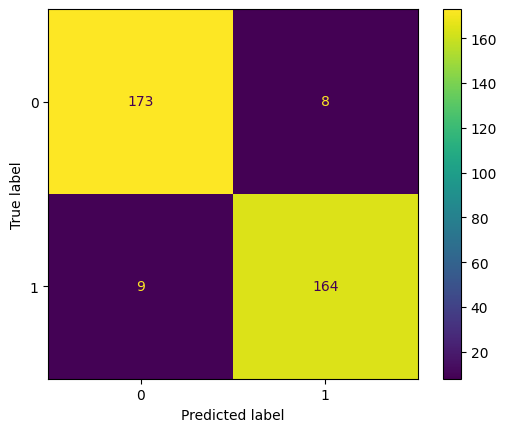

In [31]:
# Model given validation data to make prediction
predicted = model.predict(np.array(X_val))
predicted = tf.squeeze(predicted)
predicted = np.array([1 if x >= 0.5 else 0 for x in predicted])
actual = np.array(y_val)
conf_mat = confusion_matrix(actual, predicted)
displ = ConfusionMatrixDisplay(confusion_matrix=conf_mat)
displ.plot()

In [32]:
# Validation percentage
predictPerc = (conf_mat[0][0]+conf_mat[1][1])/(conf_mat[0][0]+conf_mat[0][1]+conf_mat[1][0]+conf_mat[1][1])*100
print(f"Prediction Accuracy: {predictPerc}%")

Prediction Accuracy: 95.19774011299435%


In [33]:
# # Saving the Trained Model
# model_file = "DeepVoiceModel.pkl"

# with open(model_file, "wb") as file:
#     pickle.dump(model, file)